In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [2]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485])


In [3]:
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])


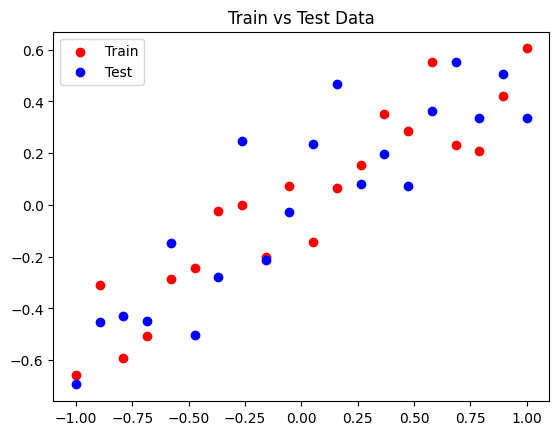

In [4]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.title("Train vs Test Data")
plt.show()


In [5]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model_1.fit(X_train, y_train, epochs=500,
                      validation_data=(X_test, y_test),
                      verbose=False)

c:\Users\Dheeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Normal Model -> Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

Normal Model -> Train MSE: 0.0043, Test MSE: 0.0461


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


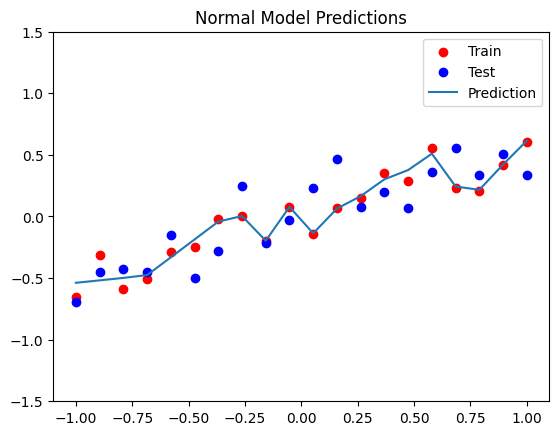

In [7]:
# Predictions
y_pred_1 = model_1.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1, label='Prediction')
plt.legend()
plt.ylim((-1.5, 1.5))
plt.title("Normal Model Predictions")
plt.show()

In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))   #better approach is to start add dropout from last one 
model_2.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data=(X_test, y_test),
                               verbose=False)

In [9]:
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Dropout Model -> Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

Dropout Model -> Train MSE: 0.0107, Test MSE: 0.0393


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


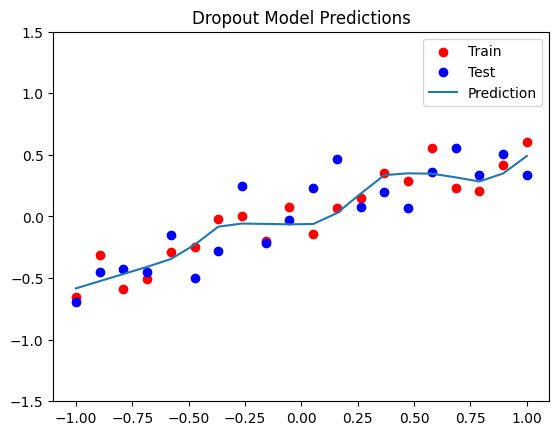

In [10]:
y_pred_2 = model_2.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2, label='Prediction')
plt.legend()
plt.ylim((-1.5, 1.5))
plt.title("Dropout Model Predictions")
plt.show()